In [50]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [51]:
df = pd.read_csv('winequality-white.csv', sep = ';')

In [52]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
df = df.drop_duplicates()

In [65]:
dataset = df.values

In [66]:
X = dataset[:, 0:11]

In [67]:
Y = dataset[:, 11]

In [68]:
Y

array([6., 6., 6., ..., 6., 7., 6.])

In [69]:
# le = preprocessing.LabelEncoder()
# Y = le.fit_transform(Y)

In [70]:
# Y = np.array(Y, dtype=np.float32)
# Y = Y.reshape(-1, 1)

In [71]:
# enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
# Y = enc.fit_transform(Y)

In [72]:
df.quality.value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [73]:
scaler = preprocessing.QuantileTransformer()
X_scale = scaler.fit_transform(X)

In [74]:
X_scale = X_scale.astype(np.float32)

In [76]:
Y = Y-3

In [78]:
Y.max()

6.0

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
Y = Y.astype(np.float32)

In [81]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.3)

In [82]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2772, 11) (832, 11) (357, 11) (2772,) (832,) (357,)


In [83]:
from keras.layers import Input, Dense, Dropout, concatenate
from keras.models import Model
from keras.utils import plot_model

In [90]:
X_train.shape[1:]

(11,)

In [228]:
tf.random.set_seed(1234)

In [332]:
input_shape = X_train.shape[1:]

input = Input(shape=input_shape)

hidden1 = Dense(11, activation="relu")(input)
#hidden2 = Dense(50, activation="relu")(hidden1)    
#hidden2 = Dense(128, activation="relu")(hidden2)
#hidden2 = Dense(256, activation="relu")(hidden2)
# concat = concatenate([input, hidden2])

# output = Dense(36, activation="relu")(concat)
# output = Dropout(.5)(output)
output = Dense(7, activation="softmax")(hidden1)#hidden2

model = Model(inputs=[input], outputs=[output])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=["accuracy"])

In [333]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 11)]              0         
                                                                 
 dense_75 (Dense)            (None, 11)                132       
                                                                 
 dense_76 (Dense)            (None, 7)                 84        
                                                                 
Total params: 216
Trainable params: 216
Non-trainable params: 0
_________________________________________________________________


In [334]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    batch_size=32, epochs=50)

Epoch 1/50
87/87 [==============================] - 1s 4ms/step - loss: 1.8854 - accuracy: 0.2807 - val_loss: 1.6247 - val_accuracy: 0.3377
Epoch 2/50
87/87 [==============================] - 0s 3ms/step - loss: 1.4812 - accuracy: 0.3784 - val_loss: 1.3603 - val_accuracy: 0.4351
Epoch 3/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3452 - accuracy: 0.4408 - val_loss: 1.2960 - val_accuracy: 0.4447
Epoch 4/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3086 - accuracy: 0.4473 - val_loss: 1.2648 - val_accuracy: 0.4639
Epoch 5/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2800 - accuracy: 0.4574 - val_loss: 1.2336 - val_accuracy: 0.4700
Epoch 6/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2513 - accuracy: 0.4693 - val_loss: 1.2106 - val_accuracy: 0.4796
Epoch 7/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2298 - accuracy: 0.4737 - val_loss: 1.1937 - val_accuracy: 0.4868
Epoch 8/50
87/87 [==

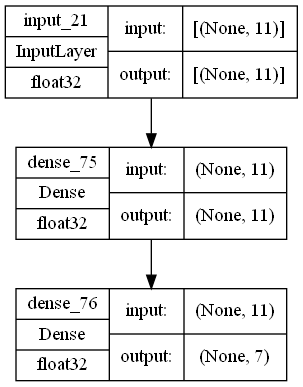

In [335]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True,show_dtype=True)

In [336]:
pred = model.predict(X_test, batch_size=32, verbose=0)

In [337]:
np.argmax(pred[0])

3

In [338]:
Y_test[0]

3.0

In [339]:
from sklearn.metrics import confusion_matrix

In [340]:
#pred

In [341]:
pred_rev = np.argmax(pred, axis=1)
#Y_test_rev = np.argmax(Y_test, axis=1)

In [342]:
confusion_matrix(Y_test, pred_rev)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   5,   4,   0,   0],
       [  0,   0,  74,  38,   2,   0],
       [  0,   0,  38, 111,  14,   0],
       [  0,   0,   0,  39,  20,   0],
       [  0,   0,   0,   2,   8,   0]], dtype=int64)

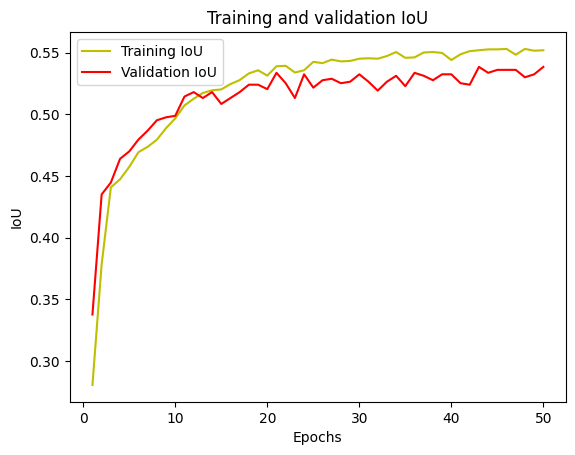

In [343]:

from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [344]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred_rev)

0.5742296918767507

---

In [392]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [393]:
# Define the model - shallow neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8, input_dim=11, activation="relu"))
nn.add(Dense(units=50, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


In [394]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model = nn.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    batch_size=32, epochs=250)

Epoch 1/250
87/87 [==============================] - 1s 4ms/step - loss: 3.6736 - mse: 3.6736 - val_loss: 1.0744 - val_mse: 1.0744
Epoch 2/250
87/87 [==============================] - 0s 3ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 0.8515 - val_mse: 0.8515
Epoch 3/250
87/87 [==============================] - 0s 3ms/step - loss: 0.8255 - mse: 0.8255 - val_loss: 0.7141 - val_mse: 0.7141
Epoch 4/250
87/87 [==============================] - 0s 3ms/step - loss: 0.7229 - mse: 0.7229 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 5/250
87/87 [==============================] - 0s 3ms/step - loss: 0.6768 - mse: 0.6768 - val_loss: 0.5976 - val_mse: 0.5976
Epoch 6/250
87/87 [==============================] - 0s 3ms/step - loss: 0.6409 - mse: 0.6409 - val_loss: 0.5723 - val_mse: 0.5723
Epoch 7/250
87/87 [==============================] - 0s 3ms/step - loss: 0.6240 - mse: 0.6240 - val_loss: 0.5498 - val_mse: 0.5498
Epoch 8/250
87/87 [==============================] - 0s 3ms/step - loss: 0.6100 - m

87/87 [==============================] - 0s 3ms/step - loss: 0.5195 - mse: 0.5195 - val_loss: 0.4669 - val_mse: 0.4669
Epoch 64/250
87/87 [==============================] - 0s 3ms/step - loss: 0.5212 - mse: 0.5212 - val_loss: 0.4679 - val_mse: 0.4679
Epoch 65/250
87/87 [==============================] - 0s 3ms/step - loss: 0.5186 - mse: 0.5186 - val_loss: 0.4693 - val_mse: 0.4693
Epoch 66/250
87/87 [==============================] - 0s 4ms/step - loss: 0.5168 - mse: 0.5168 - val_loss: 0.4862 - val_mse: 0.4862
Epoch 67/250
87/87 [==============================] - 0s 4ms/step - loss: 0.5169 - mse: 0.5169 - val_loss: 0.4649 - val_mse: 0.4649
Epoch 68/250
87/87 [==============================] - 0s 3ms/step - loss: 0.5164 - mse: 0.5164 - val_loss: 0.4654 - val_mse: 0.4654
Epoch 69/250
87/87 [==============================] - 0s 3ms/step - loss: 0.5146 - mse: 0.5146 - val_loss: 0.4665 - val_mse: 0.4665
Epoch 70/250
87/87 [==============================] - 0s 3ms/step - loss: 0.5138 - mse: 0

Epoch 125/250
87/87 [==============================] - 0s 4ms/step - loss: 0.4987 - mse: 0.4987 - val_loss: 0.4885 - val_mse: 0.4885
Epoch 126/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4978 - mse: 0.4978 - val_loss: 0.4652 - val_mse: 0.4652
Epoch 127/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4935 - mse: 0.4935 - val_loss: 0.4614 - val_mse: 0.4614
Epoch 128/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4961 - mse: 0.4961 - val_loss: 0.4635 - val_mse: 0.4635
Epoch 129/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4935 - mse: 0.4935 - val_loss: 0.4655 - val_mse: 0.4655
Epoch 130/250
87/87 [==============================] - 0s 4ms/step - loss: 0.4896 - mse: 0.4896 - val_loss: 0.4703 - val_mse: 0.4703
Epoch 131/250
87/87 [==============================] - 0s 4ms/step - loss: 0.4941 - mse: 0.4941 - val_loss: 0.4650 - val_mse: 0.4650
Epoch 132/250
87/87 [==============================] - 0s 4ms/step - 

87/87 [==============================] - 0s 3ms/step - loss: 0.4758 - mse: 0.4758 - val_loss: 0.4754 - val_mse: 0.4754
Epoch 187/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4802 - mse: 0.4802 - val_loss: 0.4705 - val_mse: 0.4705
Epoch 188/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4780 - mse: 0.4780 - val_loss: 0.4739 - val_mse: 0.4739
Epoch 189/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.4727 - val_mse: 0.4727
Epoch 190/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4766 - mse: 0.4766 - val_loss: 0.4722 - val_mse: 0.4722
Epoch 191/250
87/87 [==============================] - 0s 4ms/step - loss: 0.4780 - mse: 0.4780 - val_loss: 0.4702 - val_mse: 0.4702
Epoch 192/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4786 - mse: 0.4786 - val_loss: 0.4700 - val_mse: 0.4700
Epoch 193/250
87/87 [==============================] - 0s 3ms/step - loss: 0.4780 -

87/87 [==============================] - 0s 5ms/step - loss: 0.4691 - mse: 0.4691 - val_loss: 0.4745 - val_mse: 0.4745
Epoch 248/250
87/87 [==============================] - 0s 5ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.4774 - val_mse: 0.4774
Epoch 249/250
87/87 [==============================] - 0s 4ms/step - loss: 0.4712 - mse: 0.4712 - val_loss: 0.4867 - val_mse: 0.4867
Epoch 250/250
87/87 [==============================] - 1s 15ms/step - loss: 0.4679 - mse: 0.4679 - val_loss: 0.4738 - val_mse: 0.4738


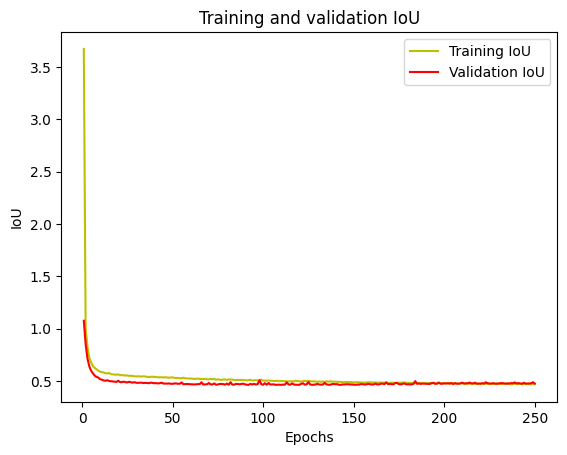

In [403]:

from matplotlib import pyplot as plt
acc = model.history['mse']
val_acc = model.history['val_mse']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [404]:
pred = nn.predict(X_test, batch_size=32, verbose=0)

In [405]:
pred=pred.reshape(357)

In [406]:
pred.shape

(357,)

In [407]:
Y_test.shape

(357,)

In [408]:
from sklearn.metrics import confusion_matrix

In [409]:
confusion_matrix(Y_test, np.around(pred))

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   6,   3,   0,   0],
       [  0,   0,  72,  42,   0,   0],
       [  0,   1,  36, 102,  24,   0],
       [  0,   0,   1,  31,  27,   0],
       [  0,   0,   0,   2,   8,   0]], dtype=int64)

In [410]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, np.around(pred))

0.5630252100840336

In [416]:
nn.save("./my_model.h5")

In [417]:
pwd

'C:\\Users\\biaspaltsau_aa\\python_folder\\NN_c\\Урок 38 API Tensorflow'

---

In [390]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
input_shape = X_train.shape[1:]
model = Sequential()
model.add(Input(shape=input_shape))
model.add(BatchNormalization())
model.add(Dense(100,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())          
model.add(Dense(100,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))

In [391]:
early_stop = EarlyStopping('val_accuracy', patience=30, verbose=1)
model_checkpoint_cnn = ModelCheckpoint(
    'cnn_model.h5', 'val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(
    factor=0.5, patience=5, min_lr=0.00001, verbose=1)

early_stop  - Остановите обучение, когда отслеживаемый показатель перестанет улучшаться
ModelCheckpoint - Обратный вызов для сохранения модели Keras или весов моделей с некоторой частотой
ReduceLROnPlateau - Уменьшите скорость обучения, когда метрика перестала улучшатьс

In [35]:
#opt= tf.keras.optimizers.Adam(learning_rate=0.01)
#callbacks=[model_checkpoint_cnn, early_stop, reduce_lr]

In [36]:
Y_train.max()

6.0

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),batch_size=32, epochs=700, verbose=1)

Epoch 1/700
108/108 [==============================] - 2s 9ms/step - loss: 1.5190 - accuracy: 0.4014 - val_loss: 1.3401 - val_accuracy: 0.5267
Epoch 2/700
108/108 [==============================] - 1s 8ms/step - loss: 1.2782 - accuracy: 0.4665 - val_loss: 1.1859 - val_accuracy: 0.5394
Epoch 3/700
108/108 [==============================] - 1s 8ms/step - loss: 1.1982 - accuracy: 0.5076 - val_loss: 1.1363 - val_accuracy: 0.5452
Epoch 4/700
108/108 [==============================] - 1s 8ms/step - loss: 1.1813 - accuracy: 0.4997 - val_loss: 1.1151 - val_accuracy: 0.5500
Epoch 5/700
108/108 [==============================] - 1s 8ms/step - loss: 1.1500 - accuracy: 0.5204 - val_loss: 1.0917 - val_accuracy: 0.5627
Epoch 6/700
108/108 [==============================] - 1s 8ms/step - loss: 1.1361 - accuracy: 0.5195 - val_loss: 1.0902 - val_accuracy: 0.5695
Epoch 7/700
108/108 [==============================] - 1s 8ms/step - loss: 1.1192 - accuracy: 0.5295 - val_loss: 1.0781 - val_accuracy: 0.5637

Epoch 58/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9927 - accuracy: 0.5616 - val_loss: 1.0228 - val_accuracy: 0.5860
Epoch 59/700
108/108 [==============================] - 1s 7ms/step - loss: 1.0028 - accuracy: 0.5668 - val_loss: 1.0215 - val_accuracy: 0.5841
Epoch 60/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9853 - accuracy: 0.5723 - val_loss: 1.0290 - val_accuracy: 0.5811
Epoch 61/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9848 - accuracy: 0.5767 - val_loss: 1.0335 - val_accuracy: 0.5763
Epoch 62/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9824 - accuracy: 0.5770 - val_loss: 1.0282 - val_accuracy: 0.5841
Epoch 63/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9872 - accuracy: 0.5799 - val_loss: 1.0289 - val_accuracy: 0.5909
Epoch 64/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9849 - accuracy: 0.5668 - val_loss: 1.0352 - val_accuracy:

Epoch 115/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9431 - accuracy: 0.5992 - val_loss: 1.0210 - val_accuracy: 0.5821
Epoch 116/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9528 - accuracy: 0.5756 - val_loss: 1.0157 - val_accuracy: 0.5918
Epoch 117/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9551 - accuracy: 0.5849 - val_loss: 1.0192 - val_accuracy: 0.5841
Epoch 118/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9620 - accuracy: 0.5828 - val_loss: 1.0255 - val_accuracy: 0.5889
Epoch 119/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9618 - accuracy: 0.5808 - val_loss: 1.0146 - val_accuracy: 0.5909
Epoch 120/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9495 - accuracy: 0.5828 - val_loss: 1.0257 - val_accuracy: 0.5782
Epoch 121/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9553 - accuracy: 0.5861 - val_loss: 1.0194 - val_ac

108/108 [==============================] - 1s 7ms/step - loss: 0.9430 - accuracy: 0.5890 - val_loss: 1.0151 - val_accuracy: 0.5889
Epoch 172/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9508 - accuracy: 0.5858 - val_loss: 1.0188 - val_accuracy: 0.5928
Epoch 173/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9289 - accuracy: 0.5907 - val_loss: 1.0183 - val_accuracy: 0.5938
Epoch 174/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9456 - accuracy: 0.5858 - val_loss: 1.0164 - val_accuracy: 0.5899
Epoch 175/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9349 - accuracy: 0.5928 - val_loss: 1.0171 - val_accuracy: 0.5928
Epoch 176/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9403 - accuracy: 0.5887 - val_loss: 1.0223 - val_accuracy: 0.5899
Epoch 177/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9555 - accuracy: 0.5878 - val_loss: 1.0285 - val_accuracy: 0.5996

108/108 [==============================] - 1s 7ms/step - loss: 0.9276 - accuracy: 0.5884 - val_loss: 1.0194 - val_accuracy: 0.5948
Epoch 228/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9219 - accuracy: 0.5977 - val_loss: 1.0188 - val_accuracy: 0.6035
Epoch 229/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9126 - accuracy: 0.5933 - val_loss: 1.0220 - val_accuracy: 0.6045
Epoch 230/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9298 - accuracy: 0.5945 - val_loss: 1.0198 - val_accuracy: 0.5977
Epoch 231/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9373 - accuracy: 0.5826 - val_loss: 1.0196 - val_accuracy: 0.5841
Epoch 232/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9276 - accuracy: 0.5875 - val_loss: 1.0199 - val_accuracy: 0.5860
Epoch 233/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9177 - accuracy: 0.6039 - val_loss: 1.0254 - val_accuracy: 0.5899

108/108 [==============================] - 1s 7ms/step - loss: 0.9083 - accuracy: 0.6012 - val_loss: 1.0277 - val_accuracy: 0.5724
Epoch 284/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9094 - accuracy: 0.6082 - val_loss: 1.0299 - val_accuracy: 0.6016
Epoch 285/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9145 - accuracy: 0.5933 - val_loss: 1.0248 - val_accuracy: 0.5918
Epoch 286/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9129 - accuracy: 0.5980 - val_loss: 1.0201 - val_accuracy: 0.5860
Epoch 287/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8989 - accuracy: 0.6044 - val_loss: 1.0301 - val_accuracy: 0.5821
Epoch 288/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9186 - accuracy: 0.5995 - val_loss: 1.0220 - val_accuracy: 0.5909
Epoch 289/700
108/108 [==============================] - 1s 8ms/step - loss: 0.9174 - accuracy: 0.5933 - val_loss: 1.0275 - val_accuracy: 0.5821

108/108 [==============================] - 1s 7ms/step - loss: 0.9051 - accuracy: 0.6100 - val_loss: 1.0223 - val_accuracy: 0.5889
Epoch 340/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8987 - accuracy: 0.6094 - val_loss: 1.0227 - val_accuracy: 0.5879
Epoch 341/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8912 - accuracy: 0.6068 - val_loss: 1.0251 - val_accuracy: 0.5889
Epoch 342/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8996 - accuracy: 0.6059 - val_loss: 1.0341 - val_accuracy: 0.5899
Epoch 343/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9110 - accuracy: 0.6106 - val_loss: 1.0334 - val_accuracy: 0.5957
Epoch 344/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9092 - accuracy: 0.5989 - val_loss: 1.0240 - val_accuracy: 0.5899
Epoch 345/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9042 - accuracy: 0.6100 - val_loss: 1.0234 - val_accuracy: 0.5948

108/108 [==============================] - 1s 7ms/step - loss: 0.8869 - accuracy: 0.6001 - val_loss: 1.0219 - val_accuracy: 0.6016
Epoch 396/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8777 - accuracy: 0.6164 - val_loss: 1.0301 - val_accuracy: 0.5889
Epoch 397/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8869 - accuracy: 0.6138 - val_loss: 1.0220 - val_accuracy: 0.5918
Epoch 398/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8959 - accuracy: 0.6155 - val_loss: 1.0214 - val_accuracy: 0.5967
Epoch 399/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8917 - accuracy: 0.6062 - val_loss: 1.0266 - val_accuracy: 0.5841
Epoch 400/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8949 - accuracy: 0.6120 - val_loss: 1.0270 - val_accuracy: 0.5909
Epoch 401/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8994 - accuracy: 0.6009 - val_loss: 1.0285 - val_accuracy: 0.5841

108/108 [==============================] - 1s 7ms/step - loss: 0.8915 - accuracy: 0.6167 - val_loss: 1.0272 - val_accuracy: 0.5792
Epoch 452/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8813 - accuracy: 0.6082 - val_loss: 1.0300 - val_accuracy: 0.5841
Epoch 453/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8942 - accuracy: 0.6106 - val_loss: 1.0272 - val_accuracy: 0.5802
Epoch 454/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8839 - accuracy: 0.6114 - val_loss: 1.0319 - val_accuracy: 0.5714
Epoch 455/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8839 - accuracy: 0.6100 - val_loss: 1.0259 - val_accuracy: 0.5860
Epoch 456/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8622 - accuracy: 0.6214 - val_loss: 1.0319 - val_accuracy: 0.5899
Epoch 457/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8780 - accuracy: 0.6260 - val_loss: 1.0336 - val_accuracy: 0.5967

108/108 [==============================] - 1s 7ms/step - loss: 0.8640 - accuracy: 0.6263 - val_loss: 1.0433 - val_accuracy: 0.5811
Epoch 508/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8651 - accuracy: 0.6149 - val_loss: 1.0335 - val_accuracy: 0.5918
Epoch 509/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8676 - accuracy: 0.6199 - val_loss: 1.0334 - val_accuracy: 0.5899
Epoch 510/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8618 - accuracy: 0.6161 - val_loss: 1.0452 - val_accuracy: 0.5811
Epoch 511/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8799 - accuracy: 0.6216 - val_loss: 1.0349 - val_accuracy: 0.5782
Epoch 512/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8784 - accuracy: 0.6167 - val_loss: 1.0312 - val_accuracy: 0.5899
Epoch 513/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8714 - accuracy: 0.6222 - val_loss: 1.0378 - val_accuracy: 0.5928

108/108 [==============================] - 1s 7ms/step - loss: 0.8882 - accuracy: 0.6050 - val_loss: 1.0327 - val_accuracy: 0.6035
Epoch 564/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8689 - accuracy: 0.6120 - val_loss: 1.0392 - val_accuracy: 0.5986
Epoch 565/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8678 - accuracy: 0.6053 - val_loss: 1.0384 - val_accuracy: 0.5967
Epoch 566/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8578 - accuracy: 0.6240 - val_loss: 1.0405 - val_accuracy: 0.5938
Epoch 567/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8637 - accuracy: 0.6246 - val_loss: 1.0432 - val_accuracy: 0.5948
Epoch 568/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8515 - accuracy: 0.6313 - val_loss: 1.0447 - val_accuracy: 0.5986
Epoch 569/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8599 - accuracy: 0.6211 - val_loss: 1.0311 - val_accuracy: 0.6006

108/108 [==============================] - 1s 7ms/step - loss: 0.8530 - accuracy: 0.6161 - val_loss: 1.0255 - val_accuracy: 0.6064
Epoch 620/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8436 - accuracy: 0.6222 - val_loss: 1.0300 - val_accuracy: 0.5986
Epoch 621/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8607 - accuracy: 0.6243 - val_loss: 1.0282 - val_accuracy: 0.6006
Epoch 622/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8586 - accuracy: 0.6234 - val_loss: 1.0269 - val_accuracy: 0.5996
Epoch 623/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8441 - accuracy: 0.6281 - val_loss: 1.0316 - val_accuracy: 0.5957
Epoch 624/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8477 - accuracy: 0.6272 - val_loss: 1.0350 - val_accuracy: 0.5860
Epoch 625/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8565 - accuracy: 0.6138 - val_loss: 1.0265 - val_accuracy: 0.5879

108/108 [==============================] - 1s 7ms/step - loss: 0.8502 - accuracy: 0.6251 - val_loss: 1.0316 - val_accuracy: 0.5957
Epoch 676/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8429 - accuracy: 0.6356 - val_loss: 1.0327 - val_accuracy: 0.5957
Epoch 677/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8281 - accuracy: 0.6301 - val_loss: 1.0387 - val_accuracy: 0.6035
Epoch 678/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8526 - accuracy: 0.6263 - val_loss: 1.0330 - val_accuracy: 0.5938
Epoch 679/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8508 - accuracy: 0.6316 - val_loss: 1.0281 - val_accuracy: 0.5957
Epoch 680/700
108/108 [==============================] - 1s 8ms/step - loss: 0.8476 - accuracy: 0.6257 - val_loss: 1.0348 - val_accuracy: 0.6035
Epoch 681/700
108/108 [==============================] - 1s 10ms/step - loss: 0.8641 - accuracy: 0.6062 - val_loss: 1.0232 - val_accuracy: 0.612

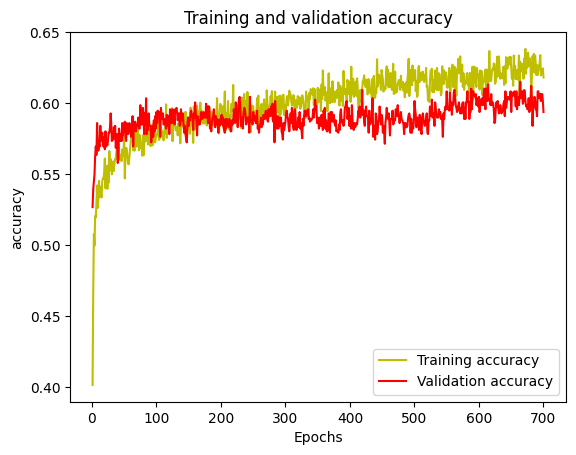

In [38]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [45]:
pred = model.predict(X_test, batch_size=32, verbose=0)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
pred_rev = np.argmax(pred, axis=1)

In [48]:
confusion_matrix(Y_test, pred_rev)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   1,   7,   1,   0,   0],
       [  0,   4,  86,  41,   2,   0],
       [  0,   0,  50, 122,  20,   0],
       [  0,   0,   5,  41,  37,   1],
       [  0,   0,   0,   9,   9,   3]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred_rev)

0.564625850340136

---

In [115]:
from tensorflow.keras.optimizers import Adam
model = Sequential([Input(shape=input_shape)
                    ,BatchNormalization()
                    ,Dense(100,activation='relu')
                    ,Dropout(0.3)
                    ,Dense(100,activation='relu')
                    ,Dropout(0.3)
                    ,BatchNormalization()
                    ,Dense(100, activation='relu')
                    ,Dropout(0.3)
                    ,Dense(12,activation='relu')
                    ,Dropout(0.1)
                    ,Dense(1)])

model.compile(optimizer=Adam(learning_rate=0.001),loss='mae',metrics=['mae'])

In [116]:
# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    batch_size=32, epochs=700)

Epoch 1/700
108/108 [==============================] - 1s 8ms/step - loss: 1.5664 - mae: 1.5664 - val_loss: 1.9333 - val_mae: 1.9333
Epoch 2/700
108/108 [==============================] - 1s 7ms/step - loss: 0.9030 - mae: 0.9030 - val_loss: 1.3063 - val_mae: 1.3063
Epoch 3/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8694 - mae: 0.8694 - val_loss: 0.9730 - val_mae: 0.9730
Epoch 4/700
108/108 [==============================] - 1s 7ms/step - loss: 0.8244 - mae: 0.8244 - val_loss: 0.8399 - val_mae: 0.8399
Epoch 5/700
108/108 [==============================] - 1s 7ms/step - loss: 0.7901 - mae: 0.7901 - val_loss: 0.7647 - val_mae: 0.7647
Epoch 6/700
108/108 [==============================] - 1s 7ms/step - loss: 0.7585 - mae: 0.7585 - val_loss: 0.7310 - val_mae: 0.7310
Epoch 7/700
108/108 [==============================] - 1s 7ms/step - loss: 0.7654 - mae: 0.7654 - val_loss: 0.6919 - val_mae: 0.6919
Epoch 8/700
108/108 [==============================] - 1s 7ms/step - 

108/108 [==============================] - 1s 7ms/step - loss: 0.5592 - mae: 0.5592 - val_loss: 0.5008 - val_mae: 0.5008
Epoch 63/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5631 - mae: 0.5631 - val_loss: 0.5140 - val_mae: 0.5140
Epoch 64/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5548 - mae: 0.5548 - val_loss: 0.5077 - val_mae: 0.5077
Epoch 65/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5538 - mae: 0.5538 - val_loss: 0.4947 - val_mae: 0.4947
Epoch 66/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5551 - mae: 0.5551 - val_loss: 0.5073 - val_mae: 0.5073
Epoch 67/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5556 - mae: 0.5556 - val_loss: 0.5063 - val_mae: 0.5063
Epoch 68/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5583 - mae: 0.5583 - val_loss: 0.5009 - val_mae: 0.5009
Epoch 69/700
108/108 [==============================] - 1s 7ms/step - loss:

108/108 [==============================] - 1s 8ms/step - loss: 0.5193 - mae: 0.5193 - val_loss: 0.4914 - val_mae: 0.4914
Epoch 124/700
108/108 [==============================] - 1s 8ms/step - loss: 0.5044 - mae: 0.5044 - val_loss: 0.4898 - val_mae: 0.4898
Epoch 125/700
108/108 [==============================] - 1s 8ms/step - loss: 0.5237 - mae: 0.5237 - val_loss: 0.4955 - val_mae: 0.4955
Epoch 126/700
108/108 [==============================] - 1s 8ms/step - loss: 0.5136 - mae: 0.5136 - val_loss: 0.4874 - val_mae: 0.4874
Epoch 127/700
108/108 [==============================] - 1s 8ms/step - loss: 0.5148 - mae: 0.5148 - val_loss: 0.4830 - val_mae: 0.4830
Epoch 128/700
108/108 [==============================] - 1s 8ms/step - loss: 0.5239 - mae: 0.5239 - val_loss: 0.4882 - val_mae: 0.4882
Epoch 129/700
108/108 [==============================] - 1s 8ms/step - loss: 0.5176 - mae: 0.5176 - val_loss: 0.4894 - val_mae: 0.4894
Epoch 130/700
108/108 [==============================] - 1s 7ms/step 

Epoch 184/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5013 - mae: 0.5013 - val_loss: 0.4875 - val_mae: 0.4875
Epoch 185/700
108/108 [==============================] - 1s 6ms/step - loss: 0.5006 - mae: 0.5006 - val_loss: 0.4895 - val_mae: 0.4895
Epoch 186/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5019 - mae: 0.5019 - val_loss: 0.4812 - val_mae: 0.4812
Epoch 187/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5040 - mae: 0.5040 - val_loss: 0.4995 - val_mae: 0.4995
Epoch 188/700
108/108 [==============================] - 1s 6ms/step - loss: 0.5029 - mae: 0.5029 - val_loss: 0.4844 - val_mae: 0.4844
Epoch 189/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4975 - mae: 0.4975 - val_loss: 0.5021 - val_mae: 0.5021
Epoch 190/700
108/108 [==============================] - 1s 6ms/step - loss: 0.5096 - mae: 0.5096 - val_loss: 0.4923 - val_mae: 0.4923
Epoch 191/700
108/108 [==============================] 

108/108 [==============================] - 1s 6ms/step - loss: 0.4939 - mae: 0.4939 - val_loss: 0.4877 - val_mae: 0.4877
Epoch 245/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4908 - mae: 0.4908 - val_loss: 0.4839 - val_mae: 0.4839
Epoch 246/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4921 - mae: 0.4921 - val_loss: 0.4781 - val_mae: 0.4781
Epoch 247/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4915 - mae: 0.4915 - val_loss: 0.4746 - val_mae: 0.4746
Epoch 248/700
108/108 [==============================] - 1s 6ms/step - loss: 0.5036 - mae: 0.5036 - val_loss: 0.4809 - val_mae: 0.4809
Epoch 249/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4923 - mae: 0.4923 - val_loss: 0.4872 - val_mae: 0.4872
Epoch 250/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4983 - mae: 0.4983 - val_loss: 0.4857 - val_mae: 0.4857
Epoch 251/700
108/108 [==============================] - 1s 7ms/step 

Epoch 305/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4906 - mae: 0.4906 - val_loss: 0.4774 - val_mae: 0.4774
Epoch 306/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4874 - mae: 0.4874 - val_loss: 0.4798 - val_mae: 0.4798
Epoch 307/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4863 - mae: 0.4863 - val_loss: 0.4838 - val_mae: 0.4838
Epoch 308/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4918 - mae: 0.4918 - val_loss: 0.4926 - val_mae: 0.4926
Epoch 309/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4882 - mae: 0.4882 - val_loss: 0.4729 - val_mae: 0.4729
Epoch 310/700
108/108 [==============================] - 1s 7ms/step - loss: 0.5025 - mae: 0.5025 - val_loss: 0.4676 - val_mae: 0.4676
Epoch 311/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4890 - mae: 0.4890 - val_loss: 0.4807 - val_mae: 0.4807
Epoch 312/700
108/108 [==============================] 

108/108 [==============================] - 1s 7ms/step - loss: 0.4823 - mae: 0.4823 - val_loss: 0.4773 - val_mae: 0.4773
Epoch 366/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4825 - mae: 0.4825 - val_loss: 0.4856 - val_mae: 0.4856
Epoch 367/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4813 - mae: 0.4813 - val_loss: 0.4794 - val_mae: 0.4794
Epoch 368/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4733 - mae: 0.4733 - val_loss: 0.4747 - val_mae: 0.4747
Epoch 369/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4772 - mae: 0.4772 - val_loss: 0.4683 - val_mae: 0.4683
Epoch 370/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4908 - mae: 0.4908 - val_loss: 0.4734 - val_mae: 0.4734
Epoch 371/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4742 - mae: 0.4742 - val_loss: 0.4902 - val_mae: 0.4902
Epoch 372/700
108/108 [==============================] - 1s 7ms/step 

Epoch 426/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4863 - mae: 0.4863 - val_loss: 0.4755 - val_mae: 0.4755
Epoch 427/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4773 - mae: 0.4773 - val_loss: 0.4959 - val_mae: 0.4959
Epoch 428/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4723 - mae: 0.4723 - val_loss: 0.4659 - val_mae: 0.4659
Epoch 429/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4827 - mae: 0.4827 - val_loss: 0.4698 - val_mae: 0.4698
Epoch 430/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4819 - mae: 0.4819 - val_loss: 0.4736 - val_mae: 0.4736
Epoch 431/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4778 - mae: 0.4778 - val_loss: 0.4841 - val_mae: 0.4841
Epoch 432/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4801 - mae: 0.4801 - val_loss: 0.4833 - val_mae: 0.4833
Epoch 433/700
108/108 [==============================] 

108/108 [==============================] - 1s 7ms/step - loss: 0.4803 - mae: 0.4803 - val_loss: 0.4713 - val_mae: 0.4713
Epoch 487/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4774 - mae: 0.4774 - val_loss: 0.4761 - val_mae: 0.4761
Epoch 488/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4737 - mae: 0.4737 - val_loss: 0.4635 - val_mae: 0.4635
Epoch 489/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4764 - mae: 0.4764 - val_loss: 0.4696 - val_mae: 0.4696
Epoch 490/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4756 - mae: 0.4756 - val_loss: 0.4517 - val_mae: 0.4517
Epoch 491/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4775 - mae: 0.4775 - val_loss: 0.4696 - val_mae: 0.4696
Epoch 492/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4720 - mae: 0.4720 - val_loss: 0.4876 - val_mae: 0.4876
Epoch 493/700
108/108 [==============================] - 1s 7ms/step 

Epoch 547/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4714 - mae: 0.4714 - val_loss: 0.4820 - val_mae: 0.4820
Epoch 548/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4769 - mae: 0.4769 - val_loss: 0.4730 - val_mae: 0.4730
Epoch 549/700
108/108 [==============================] - 1s 10ms/step - loss: 0.4751 - mae: 0.4751 - val_loss: 0.4885 - val_mae: 0.4885
Epoch 550/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4740 - mae: 0.4740 - val_loss: 0.4804 - val_mae: 0.4804
Epoch 551/700
108/108 [==============================] - 1s 9ms/step - loss: 0.4783 - mae: 0.4783 - val_loss: 0.4846 - val_mae: 0.4846
Epoch 552/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4757 - mae: 0.4757 - val_loss: 0.4750 - val_mae: 0.4750
Epoch 553/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4743 - mae: 0.4743 - val_loss: 0.4704 - val_mae: 0.4704
Epoch 554/700
108/108 [==============================]

108/108 [==============================] - 1s 6ms/step - loss: 0.4725 - mae: 0.4725 - val_loss: 0.5008 - val_mae: 0.5008
Epoch 608/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4761 - mae: 0.4761 - val_loss: 0.4695 - val_mae: 0.4695
Epoch 609/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4718 - mae: 0.4718 - val_loss: 0.4832 - val_mae: 0.4832
Epoch 610/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4730 - mae: 0.4730 - val_loss: 0.4899 - val_mae: 0.4899
Epoch 611/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4578 - mae: 0.4578 - val_loss: 0.4794 - val_mae: 0.4794
Epoch 612/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4766 - mae: 0.4766 - val_loss: 0.4700 - val_mae: 0.4700
Epoch 613/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4699 - mae: 0.4699 - val_loss: 0.4781 - val_mae: 0.4781
Epoch 614/700
108/108 [==============================] - 1s 6ms/step 

Epoch 668/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4721 - mae: 0.4721 - val_loss: 0.4697 - val_mae: 0.4697
Epoch 669/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4569 - mae: 0.4569 - val_loss: 0.4667 - val_mae: 0.4667
Epoch 670/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4617 - mae: 0.4617 - val_loss: 0.4796 - val_mae: 0.4796
Epoch 671/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4709 - mae: 0.4709 - val_loss: 0.4724 - val_mae: 0.4724
Epoch 672/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4812 - mae: 0.4812 - val_loss: 0.4714 - val_mae: 0.4714
Epoch 673/700
108/108 [==============================] - 1s 7ms/step - loss: 0.4750 - mae: 0.4750 - val_loss: 0.4728 - val_mae: 0.4728
Epoch 674/700
108/108 [==============================] - 1s 6ms/step - loss: 0.4756 - mae: 0.4756 - val_loss: 0.4766 - val_mae: 0.4766
Epoch 675/700
108/108 [==============================] 

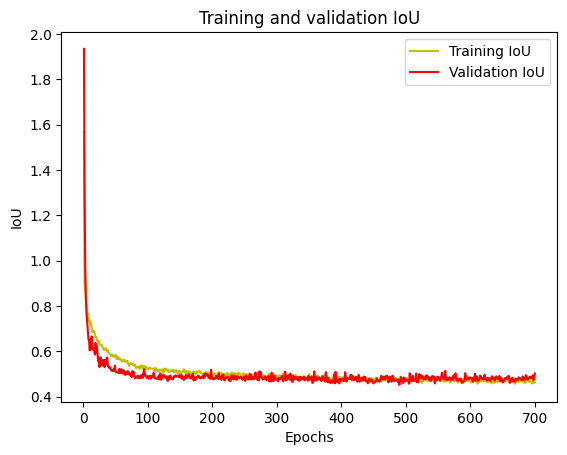

In [118]:
from matplotlib import pyplot as plt
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [119]:
pred = nn.predict(X_test, batch_size=32, verbose=0)
pred=pred.reshape(441)
confusion_matrix(Y_test, np.around(pred))

array([[  0,   0,   0,   1,   0,   0,   0],
       [  0,   1,   8,   8,   1,   0,   0],
       [  0,   1,  80,  52,   5,   0,   0],
       [  0,   1,  42, 133,  20,   0,   0],
       [  0,   0,   2,  44,  29,   0,   0],
       [  0,   0,   1,   8,   3,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, np.around(pred))

0.5510204081632653

---

In [122]:
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.regularizers import l2,l1

# model = Sequential()
# model.add(InputLayer(input_shape=(X.shape[1],)))
# model.add(BatchNormalization())
# model.add(Dense(12,activation='relu',kernel_regularizer=l2(0.01)))
# model.add(Dense(12,activation='relu',kernel_regularizer=l1(0.01)))
# model.add(Dense(1,activation='sigmoid'))

# # Compile the model
# model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# # Fit the model
# history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
#                     batch_size=32, epochs=250)
